In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [161]:
data = pd.read_csv("lung_cancer_examples.csv")
data.head()

,Name,Surname,Age,Gender,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,M,3,5,4,1
1,John,Constantine,27,M,20,2,5,1
2,Camela,Anderson,30,F,0,5,2,0
3,Alex,Telles,28,M,0,8,1,0
4,Diego,Maradona,68,M,4,5,6,1


# 1. Check null value in the data

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Gender   59 non-null     object
 4   Smokes   59 non-null     int64 
 5   AreaQ    59 non-null     int64 
 6   Alkhol   59 non-null     int64 
 7   Result   59 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 3.8+ KB


In [163]:
data.isnull().sum()

Name       0
Surname    0
Age        0
Gender     0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

a. Total data of 59 people

b. No null values

# 2. Distribution of columns

#### Age column

No. of uniques values in Age column: 37 
Range of age= [18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 33, 34, 35, 36, 37, 39, 40, 42, 43, 44, 45, 47, 50, 51, 52, 53, 55, 56, 58, 59, 62, 63, 68, 69, 73, 75, 77]
band width= 10.0


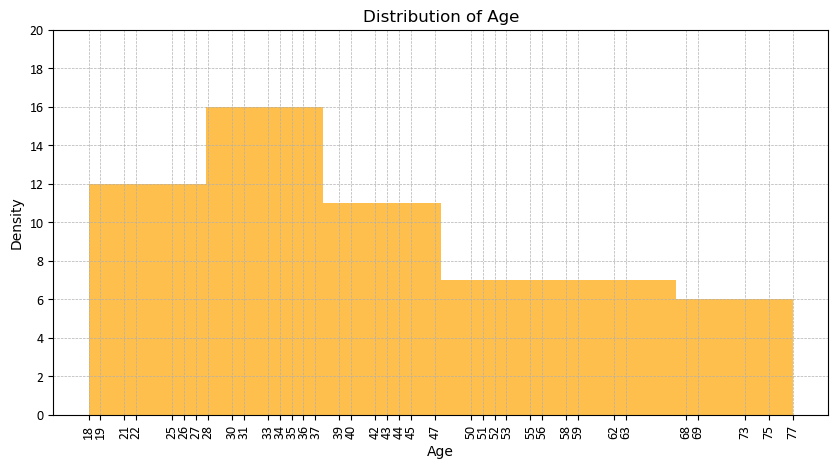

In [164]:
age_range = sorted(data.Age.unique())
print("No. of uniques values in Age column:",data.Age.nunique(),'\nRange of age=',age_range)
bins = 6

band = np.ceil((77-18)/bins)
print("band width=",band)

plt.figure(figsize=(10,5))
plt.hist(data['Age'],bins=bins,histtype='bar',alpha=0.7,color='orange')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age')

plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
plt.xticks(age_range,rotation=90,fontname='calibri',fontsize=10)
plt.yticks(np.arange(0, 21, 2),fontname='calibri',fontsize=10)
plt.show()

a. In data more people are in 28 to 38 age

#### Smokes column

16 [0, 2, 3, 4, 5, 8, 10, 12, 13, 15, 18, 20, 22, 25, 30, 34]


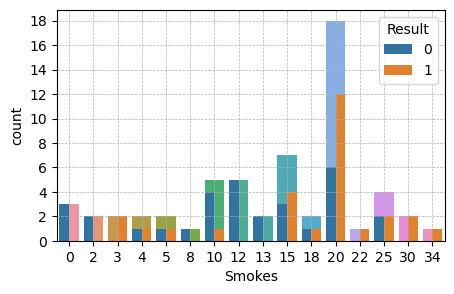

In [182]:
print(len(data.Smokes.unique()),sorted(data.Smokes.unique()))
plt.figure(figsize=(5,3))

sns.countplot(data['Smokes'])
sns.countplot(data['Smokes'],hue=data['Result'])

plt.yticks(np.arange(0,20,2))
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

#### Area quality column

The area quality index 0=worst, 10=best: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


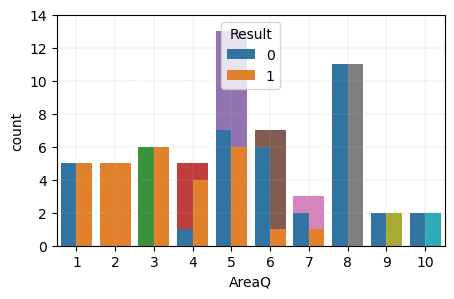

In [183]:
print("The area quality index 0=worst, 10=best:",sorted(data.AreaQ.unique()))
plt.figure(figsize=(5,3))
sns.countplot(data['AreaQ'])
sns.countplot(data['AreaQ'],hue=data['Result'])

plt.grid(linewidth=0.2,linestyle='--')

plt.yticks(np.arange(0,16,2))
plt.show()

#### Alcohol consuption column

The Alcohol consumption index 0=no alcohol, 10=alcoholic: [0, 1, 2, 3, 4, 5, 6, 7, 8]


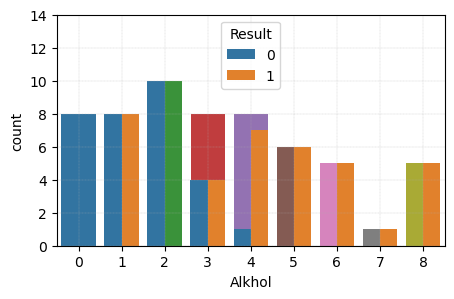

In [184]:
print("The Alcohol consumption index 0=no alcohol, 10=alcoholic:",sorted(data.Alkhol.unique()))
plt.figure(figsize=(5,3))
sns.countplot(data['Alkhol'])
sns.countplot(data['Alkhol'],hue=data['Result'])
plt.grid(linewidth=0.2,linestyle='--')

plt.yticks(np.arange(0,16,2))
plt.show()

#### Gender column

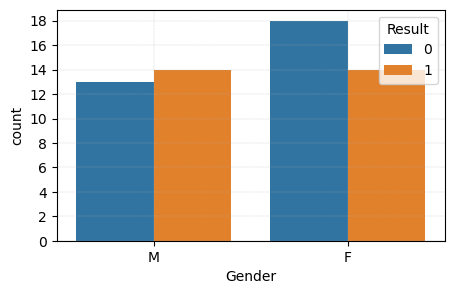

In [209]:
plt.figure(figsize=(5,3))

sns.countplot(data['Gender'],hue=data['Result'])

plt.grid(linewidth=0.2,linestyle='--')

plt.yticks(np.arange(0,20,2))

plt.show()

# 3. Check column relationship

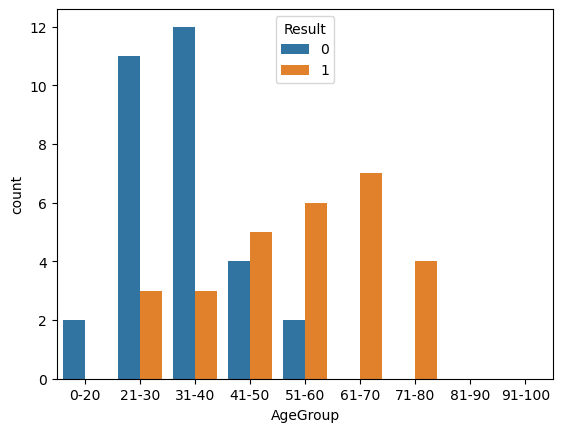

In [246]:
data['AgeGroup']=pd.cut(data["Age"],bins=[0,21,31,41,51,61,71,81,91,101],labels=['0-20','21-30','31-40','41-50','51-60'
                                                                                 ,'61-70','71-80','81-90','91-100'],right=False)

sns.countplot(data=data,x='AgeGroup',hue='Result')
plt.show()

a. High age people more prone to cancer.

In [264]:
#as we ordinal varibale, spearman will give us monotonic non linear relationship
df = data.drop(columns=['Name','Surname','Gender','AgeGroup'])
df.corr(method='spearman')

,Age,Smokes,AreaQ,Alkhol,Result
Age,1.000000,0.102126,-0.303318,0.357155,0.630178
Smokes,0.102126,1.000000,-0.343301,0.462142,0.398022
AreaQ,-0.303318,-0.343301,1.000000,-0.732136,-0.763720
Alkhol,0.357155,0.462142,-0.732136,1.000000,0.841246
Result,0.630178,0.398022,-0.763720,0.841246,1.000000


a. in correlation we find alcoholic person tend to have lung cancer, It should also show strong relationship with smokers.

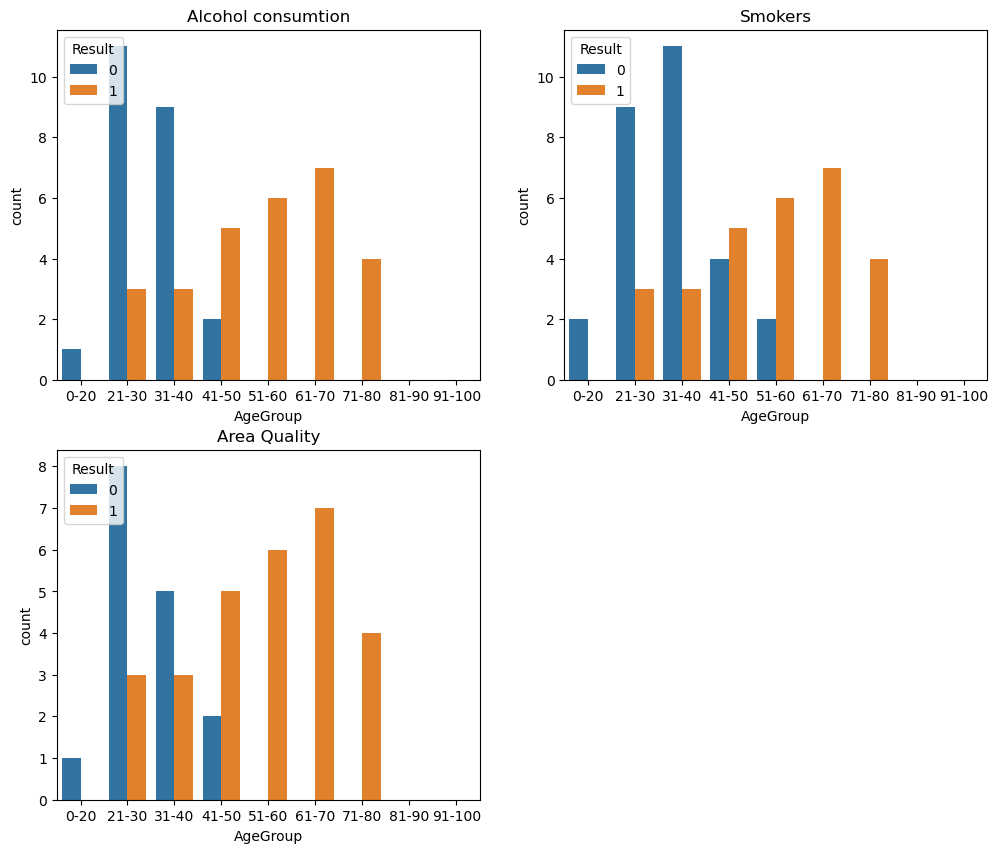

In [303]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('Alcohol consumtion')
sns.countplot(data[data['Alkhol']>0]['AgeGroup'],hue=data.Result)

plt.subplot(2,2,2)
plt.title('Smokers')
sns.countplot(data[data['Smokes']>0]['AgeGroup'],hue=data.Result)

plt.subplot(2,2,3)
plt.title('Area Quality')
sns.countplot(data[data['AreaQ']<8]['AgeGroup'],hue=data.Result)

plt.show()

a. alcoholic with age>50 have lung cancer

b. older people with smoking habit will have cancer

c. people live area quality below average have cancer.